In [1]:
import numpy as np
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Notation

A single training example is denoted by -

$$ ( x , y ) \,\,\,,\, y \in \{0,1\} $$

And for m training examples - 

$$ TrainingSet = \{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), .... , (x^{(m)},y^{(m)})\}$$

The feature vectors for training samples -

$$X = \begin{pmatrix} x^{(1)}_1 & x^{(2)}_1 & ... & x^{(m)}_1 \\ x^{(1)}_2 & x^{(2)}_2 & ... & x^{(m)}_2 \\ . & . & ... & .  \\ x^{(1)}_n & x^{(2)}_n & ... & x^{(m)}_n  \end{pmatrix} \,\,\,,\, X \in R^{n_x \times m}$$

and X.shape = (n x m) where m is number of samples, n is the dimensionality of the feature vector (usually the # of features). *This is different in than other ML algos where the shape is (m x n) as its easier to implement neural networks in this way.*

Similarly,

$$Y = \begin{pmatrix} y^{(1)} & y^{(2)} & .... & y^{(m)} \end{pmatrix} \,\,,\, Y \in R^{1 \times m}$$

```python
X.shape = (n,m)
Y.shape = (1,m)
```

# Logistic Regression

Given $x$, want $\hat y = P(y=1 \mid x)$ where $x \in R^{n_x}$

Parameters: $w \in R^{n_x}$ , $b \in R$

*If you were using linear regression then you would make a linear equation as $ \hat y = w^Tx + b$ but this isnt a good algo for binary classification since you want $0 \leq \hat y \leq 1$ since R.H.S can be any positive or negative quantity.*

Thus, we use the sigmoid function for this - 

$$ \hat y = \sigma(w^Tx + b)$$

The formula for sigmoid function - 

$$ \sigma(Z) = {1 \over 1+e^{-Z}} $$

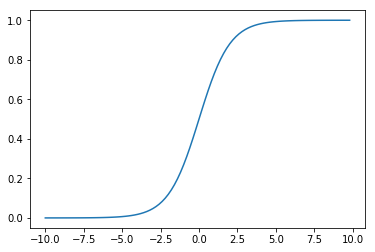

In [2]:
# What does the sigmoid function look like?
def sigmoid(x):
    return [1/(1+math.exp(-i)) for i in x]

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

If Z is very large positive then $\sigma(Z) \approx 1$, and if Z is very large negative then $\sigma(Z) \approx 0$

**Objective - When you implement logistic regression, your job is to implement parameters $w$ and $b$ so that $\hat y$ becomes a good estimate of the chance of $y$ being equal to one.**

In some conventions, you make $x_0 = 1, x \in R^{n_x+1}$ and this allows you to handle $b$ with $\hat y = \sigma(\theta^Tx)$ where $\theta_0$ represents $b$ and all other values represent $w$

$$ \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \\ . \\ . \\ \theta_n \end{pmatrix}$$

<u>*Turns out that in neural networks, its easier to keep $b$ and $w$ separately.*</u>

# Logistic Regression Cost function

Given, $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), .... , (x^{(m)},y^{(m)})\}$ , want $\hat y^{(i)} \approx y^{(i)}$

$\hat y^{(i)} = \sigma(w^Tx^{(i)} + b)$ , where $\sigma(Z^{(i)}) = {1 \over 1+e^{-Z^{(i)}}}$

$(i)$ means $i^{th}$ sample.

**Objective - We need to define a function to measure how good is our output $\hat y$ is when the true label is $y$.**

One thing that could be done is create a loss (error) function, $L(\hat y, y) = {1 \over 2}(\hat y - y)^2$

This is called squared error, *but in logistic regression we don't do this since the optimization problem for logistic regression becomes non-convex with multiple local minimas causing gradient descent to not work properly.*

Therefore, we define a different loss function which works similar to squared error but gives a convex function so that an optimizer can run properly.

$$ L(\hat y, y) = -(y \log(\hat y) + (1-y) \log(1-\hat y)) $$

If $y=1$ : $L(\hat y, y) = -\log \hat y $ which means you want $\log \hat y$ to be large, or $\hat y$ to be large.

If $y=0$ : $L(\hat y, y) = -\log(1- \hat y) $ which means you want $\log (1-\hat y)$ to be large, or $\hat y$ to be small.


In [3]:
# How do Squared error and Log loss vary on a continous space
def squarederror(x,y):
    return (0.5*((x-y)**2))

def logloss(x,y):
     return (-1*((x*np.log(y))+((1-x)*(np.log(1-y)))))

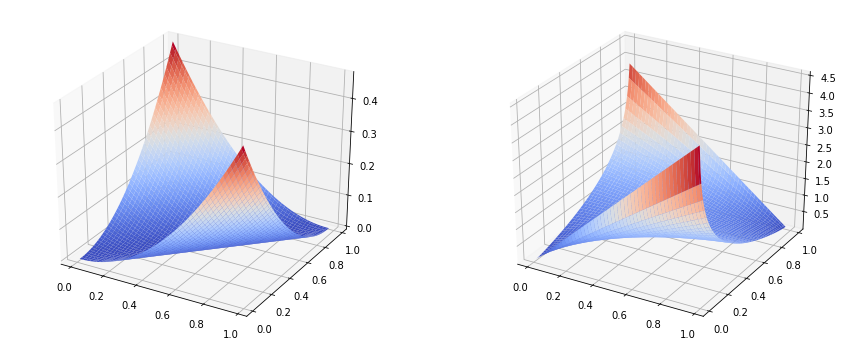

In [4]:
true_label = np.arange(0.01, 0.99, 0.01) #np.array([0,1]) for a binary label
predicted = np.arange(0.01, 0.99, 0.01)
X,Y = np.meshgrid(true_label, predicted)
Z1 = squarederror(X,Y)
Z2 = logloss(X,Y)

fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121,projection='3d')
bx = fig.add_subplot(122,projection='3d')

se = ax.plot_surface(X, Y, Z1,cmap='coolwarm')
ll = bx.plot_surface(X, Y, Z2,cmap='coolwarm')

The above plots show that both error funtions approach very high values if the **predicted label** and **true label** are 1,0 or 0,1 respectively (meaning they dont agree), while it approaches 0 as the 2 labels start become similar. 

Interestingly, the logloss graph as a negative gaussian curvature causing it to have a non zero value for error, when both true and pred labels are around 0.5. However this case wont occur in logistic regression since we only deal with discrete values.

In [5]:
print('Logloss for 0.5 true and 0.5 pred ->',logloss(0.5,0.5))
print('Squared error for 0.5 true and 0.5 pred ->',squarederror(0.5,0.5))

Logloss for 0.5 true and 0.5 pred -> 0.6931471805599453
Squared error for 0.5 true and 0.5 pred -> 0.0


The cost function -

$$ J(w,b) = {1 \over m} \sum\limits_{i=1}^{m} {L(\hat y^{(i)},y^{(i)})} = {-1 \over m} \sum\limits_{i=1}^{m} {(y^{(i)} \log(\hat y^{(i)}) + (1-y^{(i)}) \log(1-\hat y^{(i)}))}$$

# Details of the Cost function of Logistic Regression

We want to interpret $\hat y = P(y=1 \mid x)$

This can also be written as - 
1. If $y = 1$ : $P(y \mid x) = \hat y$
2. If $y = 0$ : $P(y \mid x) = 1 - \hat y$

So now, if we combine them we get - 
$$P(y \mid x) = \hat y^{(y)} (1-\hat y)^{(1-y)}$$

1. If $y = 1$ : $P(y \mid x) = \hat y^{1} (1-\hat y)^{0} = \hat y$
2. If $y = 0$ : $P(y \mid x) = \hat y^{0} (1-\hat y)^{1} = 1- \hat y$

Because the log function is a strictly monotonically increasing function, optimizing $log(P(y \mid x))$ should give similar result  to optimizing $P(y \mid x)$


So, we get 

$$ log(P(y \mid x)) = log(\hat y^{(y)} (1-\hat y)^{(1-y)}) $$
$$ = y log(\hat y) + (1-y)log(1-\hat y) = -L(\hat y, y) $$

The negative sign is there cuz you want to maximize the log of probability, which is equal to minimizing the Loss function.

Now for Cost function of m training examples,

P(labels in training set) = $\prod\limits_{i=1}^{m}{P(y^{(i)} \mid x^{(i)})}$

If you want to carry out maximum likelyhood estimation, then you want to find the params that maximize the chance in your training set. But maximizing P is the same as maximizing the logs.

log(P(labels in training set)) = $\sum\limits_{i=1}^{m}{log(P(y^{(i)} \mid x^{(i)}))} = - \sum\limits_{i=1}^{m} {L(\hat y^{(i)},y^{(i)})}$

(**Principle of maximum likelyhood estimation**: Maximum likelihood estimation is a method that determines values for the parameters of a model. The parameter values are found such that they maximise the likelihood that the process described by the model produced the data that were actually observed. [Refer this](https://towardsdatascience.com/probability-concepts-explained-maximum-likelihood-estimation-c7b4342fdbb1))

So Cost (minimize) : $J(w,b) = {1 \over m} \sum\limits_{i=1}^{m} {L(\hat y^{(i)},y^{(i)})}$

# Gradient Descent

Now we know from before that $\hat y^{(i)} = \sigma(w^Tx^{(i)} + b)$ , where $\sigma(Z^{(i)}) = {1 \over 1+e^{-Z^{(i)}}}$

We want to find w,b that minimizes $J(w,b)$

Given a convex surface for $J(w,b)$, repeat -

$$ w:=w - \alpha{\partial J(w,b) \over \partial w} $$
$$ b:=b - \alpha{\partial J(w,b) \over \partial b} $$

where $\alpha$ is learning rate. In code it looks like - 

```python
w:=w-a*dw
b:=b-a*db
```

The partial derivative of $J(w,b)$ w.r.t. $w$ or $b$ basically means how much that function slopes in the $w$ or $b$ direction.

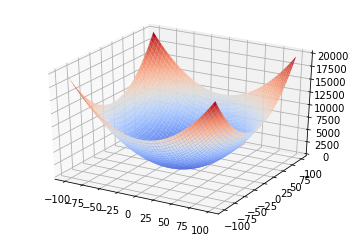

In [6]:
#Convex surface is needed for the Gradient Descent 
#to find the value of W & B where J (error) is miniumum.

w = np.arange(-100,100,1)
b = np.arange(-100,100,1)

W,B = np.meshgrid(w,b)

J = (W**2 + B**2)

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(W,B,J,cmap='coolwarm')

# Computation Graph

![computationgraph](computationgraph.PNG)

The 'forward pass' and 'backward pass' in a neural networks is due to computation graphs. In the above image we have a simple calculation - 

In [8]:
a = 5
b = 3
c = 2

u=b*c
v=a+u
J=3*v
print("u ->",u)
print("v ->",v)
print("J ->",J)

u -> 6
v -> 11
J -> 33


Lets say we now bump up v to 11.001, that results in J going up 33.003. So derivative of J w.r.t. v is 3.

This means - 

$$J = 3*v$$

$${dJ \over dv} = 3$$

Similarly, if we change a from 5 to 5.001, then that changes v to 11.001 which in turn causes J to change to 33.003. So, the net change to the value of J with change to a is given as -

$$ {dJ \over da} = {dJ \over dv}{dv \over da} = 3 * 1 = 3 $$

This is called the chain rule. A large number of your calculations will involve the optimization of finaloutputvariable, J, by calculating derivative of J against a variable var. In python, the **notation** we use for this is -

```python
dvar = "Derivative of J against Var"

#In above example
dv = 3
da = 3*1

```

Next, if we change u from 6 to 6.001, v changes to 11.001 and J changes to 33.003

$$ {dJ \over du} = {dJ \over dv}{dv \over du} = 3 * 1 = 3 $$

Or,

```python
du = 3*1
```

But if we increase b from 3 to 3.001, u changes from 6 to 6.002 (with c = 2)

$$ {dJ \over db} = {dJ \over dv}{dv \over du}{du \over db} = 3*1*2 = 6 $$

Or,

```python
db = 6
```

Lastly, same method can be applied for c.

$$ {dJ \over dc} = {dJ \over dv}{dv \over du}{du \over dc} = 3*1*3 = 9 $$

Or,

```python
dc = 9
```


# Logistic regression gradient descent

Recap - 

1. $ z = w^T x + b $
2. $ \hat y = a = \sigma(z) $
3. $ L(a,y) = -(y log(a) + (1-y) log(1-a)) $

The computation graph for a 2 variable (x1,x2) logistic regression problem is as below - 

![LR_graph](LR_graph.PNG)

The finaloutputvariable here is $L(a,y)$. 

$${dL \over da} = da = -{y \over a} + {1-y \over 1-a}$$

and, 

$${dL \over dz} = {dL \over da}{da \over dz} = dz = (-{y \over a} + {1-y \over 1-a}) * a(1-a) = a-y$$

and,

$${\partial L \over \partial w_1} = dw_1 = X_1dz$$
$${\partial L \over \partial w_2} = dw_2 = X_2dz$$
$${\partial L \over \partial b} = db = dz$$

Lastly, 

$$ w_1 := w_1 - \alpha * dw_1 $$
$$ w_1 := w_2 - \alpha * dw_2 $$
$$ b := b - \alpha * db $$

# GDA for m training examples

$$ J(w,b) = {1 \over m} \sum\limits_{i=1}^{m} {L(a^{(i)},y^{(i)})} $$

$$ a^{(i)} = \hat y^{(i)} = \sigma(z^{(i)}) = \sigma(w^Tx^{(i)}+b)$$

```python
#Pseudo code for GDA for m training examples

J = 0; dw1 = 0; dw2 = 0; db = 0 #Initialize variables to 0

for i = 1 to m:  #Loop for m training examples
    z_i = w^T.X_i + b  #Calculate z for ith example
    a_i = sigma(z_i)  #Calculate sigma of z (logistic function)
    
    #Append loss of ith training example
    J += -[y_i.log(a_i) + (1-y_i)log(1-a_i)] 
    dz_i = a_i - y_i   #Calculate derivative of z of ith example
    
    #This is for 2 variables x1, x2 currently
    #This will be another for-loop for n variables
    dw1 += x1_i.dz_i   #Append derivative of w1 for ith example
    dw2 += x2_i.dz_i   #Append derivative of w2 for ith example
    db += dz_i      #Append derivative of b for ith example

J /= m     #Divide the variables by m
dw1 /= m
dw2 /= m
db /= m
```

# Vectorization

Vectorization - Art of getting rid of explicit for loops.

$$ z = w^Tx + b $$

where, $w,x \in R^{n_x}$


```python

#Non vectorized code
z = 0
for i in range(n-x):
    z += w[i] * x[i]
z += b

#Vectorized code
z = np.dot(w,x)+b
```

In [24]:
import time

a = np.random.rand(1000000)
b = np.random.rand(1000000)

tic = time.time()
c = np.dot(a,b)
toc = time.time()

print(c)
print("Vectorized time ->",str(1000*(toc-tic))+' ms')

c = 0
tic = time.time()
for i in range(1000000):
    c+=a[i]*b[i]
toc = time.time()

print(c)
print("Non-Vectorized time ->",str(1000*(toc-tic))+' ms')

250045.00740871247
Vectorized time -> 0.7333755493164062 ms
250045.00740871366
Non-Vectorized time -> 365.7650947570801 ms


You can implement SIMD (Single instruction and multiple data), GPU and CPU can be used to take advantage of their parallelism.

Lets say we want to implement $\sum\limits_{j} {A_{ij}V_j}$. We could use -

```python
u = np.dot(A,V)
```

Lets say we have a vector $v = \begin{pmatrix} v_1 \\ . \\ . \\ v_n \end{pmatrix}$ and we need $u = \begin{pmatrix} e^{v_1} \\ . \\ . \\ e^{v_n} \end{pmatrix}$

Non vectorized approach to this will be as - 

```python
u = np.zeros((n,1))
for i in range(n):
    u[i] = math.exp(v[i])
```

The vectorized function for this is - 

```python
u = np.exp(v)
#np.log(v), np.abs(v), np.max(v,0), v**2, 1/v
```

Back to the logistic regression GDA, we can remove the 2nd for loop for n features. 

```python
#Pseudo code for GDA for m training examples

J = 0; db = 0
dw = np.zeros((n_x,1))

for i = 1 to m:  
    z_i = w^T.X_i + b  
    a_i = sigma(z_i)
    J += -[y_i.log(a_i) + (1-y_i)log(1-a_i)] 
    dz_i = a_i - y_i  
    
    #Vectorized loop
    dw += X_i.dz_i
    db += dz_i

J /= m 
dw /= m
db /= m
```

Now, for each iteration $(i)$ of samples m, we have to first compute $z^{(i)} = w^Tx^{(i)} + b$

And we know that our sample matrix looks like -

$$X = \begin{pmatrix} x^{(1)}_1 & x^{(2)}_1 & ... & x^{(m)}_1 \\ x^{(1)}_2 & x^{(2)}_2 & ... & x^{(m)}_2 \\ . & . & ... & .  \\ x^{(1)}_n & x^{(2)}_n & ... & x^{(m)}_n  \end{pmatrix} \,\,\,,\, X \in R^{n_x \times m}$$

So, we can compute the row vector Z - 

$$ \begin{pmatrix}z^{(1)} & z^{(2)} & ... & z^{(m)} \end{pmatrix} = w^T.X + \begin{pmatrix}b & b & ... & b \end{pmatrix}$$
$$ = \begin{pmatrix} (w^Tx^{(1)}+b) & (w^Tx^{(2)}+b) & ... & (w^Tx^{(m)}+b) \end{pmatrix}$$

So, in python, what you can do is - 

```python
Z = np.dot(w.T, x) + b  
#b gets added as a (1,m) array using broadcasting
```

After this you can compute $A = \sigma(Z)$ using a vectorized implementation.

Next, we know that $dz^{(i)} = a^{(i)} - y^{(i)}$

So, $dZ = A-Y$ in python implementation using vectorized code.

For the += for db, 

$$db = {1 \over m} \sum\limits_{i=1}^{m} {dz^{(i)}} = {1 \over m} np.sum(dZ)$$

Similarly for dw -

$$ dw = {1 \over m}(X.dZ^T)$$

$$ = {1 \over m} X_{n \times m}.\begin{pmatrix}dz^{(1)} \\ . \\ . \\ dz^{(m)}\end{pmatrix}_{m \times 1}$$

$$ = {1 \over m}\begin{pmatrix}x^{(1)}.dz^{(1)}+ ... +x^{(m)}.dz^{(m)}  \end{pmatrix}$$

So, the final vectorized implementation of a single iteration of GDA now becomes - 

```python
Z = np.dot(w.T,X) + b
A = sigma(Z)
dZ = A-Y
dw = (1/m) * X * dZ.T
db = (1/m) * np.sum(dZ)

w := w - alpha*dw
b := b - alpha*db
```

Now you will ofcourse need a for loop for more iterations of GDA to implement logistic regression.

# Broadcasting

Calories from Carbs, Proteins, Fats in 100g of different foods:

Calories|Apples|Beef|Eggs|Potatos
---|---|---|---|---
Carbs|56.0|0.0|4.4|68.0
Proteins|1.2|104.0|52.0|8.0
Fat|1.8|135.0|99.0|0.9

Calculate the % of calories from Carb, Potatos, Fat. Can you do that without an explicit for loop?

In [25]:
A = np.array([[56.0,0.0,4.4,68.0],
              [1.2,104.0,52.0,8.0],
              [1.8,135.0,99.0,0.9]])
A

array([[ 56. ,   0. ,   4.4,  68. ],
       [  1.2, 104. ,  52. ,   8. ],
       [  1.8, 135. ,  99. ,   0.9]])

In [28]:
cal = A.sum(axis=0)  #0 is going vertically, 1 is going horizontally
cal

array([ 59. , 239. , 155.4,  76.9])

In [30]:
percentage = 100*A/(cal.reshape(1,4)) #reshape is only for safety
percentage

array([[94.91525424,  0.        ,  2.83140283, 88.42652796],
       [ 2.03389831, 43.51464435, 33.46203346, 10.40312094],
       [ 3.05084746, 56.48535565, 63.70656371,  1.17035111]])

So, we had a $(3 \times 4)$ matrix and we divided it by a $(1 \times 4)$ matrix

In [45]:
a = np.array([1,2,3,4])
b = a+100                     #100 expands to [100,100,100,100]
b

array([101, 102, 103, 104])

In [46]:
c = np.array([[1,2,3],        # (2,3) matrix
              [4,5,6]])
d = np.array([100,200,300])   # (1,3) matrix
c+d                           #d expands to 2,3

array([[101, 202, 303],
       [104, 205, 306]])

In [47]:
c = np.array([[1,2,3],        # (2,3) matrix
              [4,5,6]])
e = np.array([[100],          # (2,1) matrix
              [200]])
c+e                           # e expands to (2,3)

array([[101, 102, 103],
       [204, 205, 206]])

More information about Broadcasting - https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html

# A note on Numpy Vectors

Another important note is about rank 1 and rank 2 arrays.

In [61]:
a = np.random.rand(5)
a.shape

#This is a rank 1 array

(5,)

In [53]:
# Transpose has no effect
print(a)
print(a.T)

[0.03835248 0.64229085 0.69858127 0.05695635 0.20941041]
[0.03835248 0.64229085 0.69858127 0.05695635 0.20941041]


In [54]:
# Dot product is a single number
np.dot(a,a.T)

0.9491209977567899

In [55]:
b = np.random.rand(5,1)
b.shape

(5, 1)

In [56]:
print(b)
print(b.T)

[[0.34995924]
 [0.95773166]
 [0.37119303]
 [0.47860554]
 [0.99393263]]
[[0.34995924 0.95773166 0.37119303 0.47860554 0.99393263]]


In [58]:
np.dot(b,b.T)  #Outer product of b

array([[0.12247147, 0.33516704, 0.12990243, 0.16749243, 0.34783591],
       [0.33516704, 0.91724994, 0.35550331, 0.45837568, 0.95192075],
       [0.12990243, 0.35550331, 0.13778426, 0.17765504, 0.36894086],
       [0.16749243, 0.45837568, 0.17765504, 0.22906327, 0.47570167],
       [0.34783591, 0.95192075, 0.36894086, 0.47570167, 0.98790207]])

More info - 

1. https://en.wikipedia.org/wiki/Dot_product
2. https://en.wikipedia.org/wiki/Outer_product

In [65]:
# Check if dims are correct
assert(a.shape==(5,1))

AssertionError: 

In [66]:
#Fix using reshape
a = a.reshape(5,1)
print(a)

[[0.20563759]
 [0.12626163]
 [0.08572756]
 [0.83040675]
 [0.62725683]]


# Programming Assigment And Theory (Part 1)

### 1. Sigmoid Function

Sigmoid function is sometimes also known as logistic function. It is a non-linear function used not only in ML (Logistic regression) but also in Deep learning. Its exponential part can be implemented by using math.exp() and np.exp(), but np is preferred over math since it works on matrices.

$$ Sigmoid(x) = {1 \over 1+e^{-x}} $$


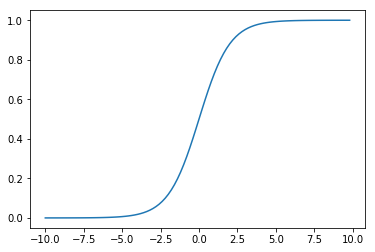

In [68]:
# What does the sigmoid function look like?
def sigmoid(x):
    return [1/(1+math.exp(-i)) for i in x]

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

In [69]:
def sigmoid(x):
    s = 1/(1+np.exp(-1*x))
    return s

x = np.array([1,2,3])
sigmoid(x)

array([0.73105858, 0.88079708, 0.95257413])

### 2. Reshaping arrays

Two common numpy functions used in deep learning are np.shape and np.reshape()

- X.shape gives the dimensions of the matrix/vector
- X.reshape() is used to reshape X into other dimensions

Example if we have a 3d array of shape (length, height, depth) and we want it to be a vector of 1d, we can reshape it to (length \* height \* depth, 1)

In [70]:
def image2vec(x):
    v = image.reshape((image.shape[0]*image.shape[1]*image.shape[2],1))
    return v

image = np.array([[[ 0.67826139,  0.29380381],
        [ 0.90714982,  0.52835647],
        [ 0.4215251 ,  0.45017551]],

       [[ 0.92814219,  0.96677647],
        [ 0.85304703,  0.52351845],
        [ 0.19981397,  0.27417313]],

       [[ 0.60659855,  0.00533165],
        [ 0.10820313,  0.49978937],
        [ 0.34144279,  0.94630077]]])

print("Old shape ->", image.shape)
print("New shape ->", image2vec(image).shape)

Old shape -> (3, 3, 2)
New shape -> (18, 1)


### 3. Normalizing Rows

Another common technique we use in ML and Deep learning is to normalize data. It leads to better performance because gradient descent converges faster after normalization. 
$$ x \implies {x \over \|x\|} $$

$$ x = \begin{bmatrix} 0 & 3 & 4 \\ 2 & 6 & 4 \end{bmatrix} $$

$$ x_{normalized} = \begin{bmatrix} 0  & {3 \over 5} & {4 \over 5} \\ {2 \over \sqrt{56}} & {6 \over \sqrt{56}} & {4 \over \sqrt{56}} \end{bmatrix} $$

In [71]:
def normalizeRows(x):
    x_norm = np.linalg.norm(x, ord=2, axis=1, keepdims=True)
    x = x/x_norm
    return x

x = np.array([[0,3,4],
              [1,6,4]])

normalizeRows(x)

array([[0.        , 0.6       , 0.8       ],
       [0.13736056, 0.82416338, 0.54944226]])

### 4. Broadcasting & Softmax

Details about broadcasting are mentioned above, in the theory. Softmax function can be thought of as a normalizing function used when your algorithm needs to classify two or more classes. More details about this in part 2 of course.

For $x \in \mathbb{R}^{1 \times n}$, 

$softmax(\begin{bmatrix} x_1 & x_2 & .. & x_n \end{bmatrix}) = \begin{bmatrix}
     \frac{e^{x_1}}{\sum_{j}e^{x_j}}  &&
    \frac{e^{x_2}}{\sum_{j}e^{x_j}}  &&
    ...  &&
    \frac{e^{x_n}}{\sum_{j}e^{x_j}} 
\end{bmatrix} $ 

For $x \in \mathbb{R}^{m \times n}$,

$softmax(x) = \begin{bmatrix} softmax(row_1) \\ softmax(row_2) \\ ... \\ softmax(row_n) \end{bmatrix}$

In [72]:
def softmax(x):
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=1, keepdims=True)
    s = x_exp/x_sum
    return s

x = np.array([[9,2,5,0,0],
              [7,5,0,0,0]])

softmax(x)

array([[9.80897665e-01, 8.94462891e-04, 1.79657674e-02, 1.21052389e-04,
        1.21052389e-04],
       [8.78679856e-01, 1.18916387e-01, 8.01252314e-04, 8.01252314e-04,
        8.01252314e-04]])

### 5. Vectorized Numpy functions

In deep leanring you deal with large datasets, so a non-computationally optimal function can become a huge bottleneck in your algorithm and can result in a model to take ages to run. This is where Vectorization comes in. Numpy implements vectorization on single and multidimensional arrays.

In [77]:
x1 = [1,2,3,4]
x2 = [4,3,2,1]
W = np.random.rand(3,len(x1))

print("W -> ",W)

print("Dot Product ->",np.dot(x1,x2))
print("Outer Product ->",np.outer(x1,x2))
print("Elementwise Product ->",np.multiply(x1,x2))
print("General Dot Product ->",np.dot(W,x1))

W ->  [[0.28541348 0.66982414 0.42064968 0.5583466 ]
 [0.35547894 0.02146779 0.44472341 0.06704476]
 [0.62220503 0.88459356 0.22022488 0.48520266]]
Dot Product -> 20
Outer Product -> [[ 4  3  2  1]
 [ 8  6  4  2]
 [12  9  6  3]
 [16 12  8  4]]
Elementwise Product -> [4 6 6 4]
General Dot Product -> [5.12039719 2.00076377 4.99287741]


### 6. L1 and L2 loss functions

Loss is used to evaluate the performance of your model. The bigger your loss, the more different your predictions ($\hat y$) are from your true values ($y$). In deep learning, you use optimization algos such as gradient descent to train your model to minimize the cost.

$$ L_1(\hat y, y) = \sum\limits_{i=0}^{m} {\mid y^{(i)} - \hat y^{(i)} \mid} $$

$$ L_2(\hat y, y) = \sum\limits_{i=0}^{m} {(y^{(i)} - \hat y^{(i)})^2} $$

**Note :** The L2 loss can be implemented just by using np.dot(x,x) = $\sum\limits_{j=0}^{n} {x_j^2}$. 

In [79]:
def l1(yhat, y):
    loss = np.sum(np.abs(y-yhat))
    return loss

def l2(yhat, y):
    loss = np.dot(y-yhat,y-yhat)
    return loss

yhat = np.array([0.9,0.2,0.1,0.4,0.9])
y = np.array([1,0,0,1,1])

print("L1 loss ->",l1(yhat,y))
print("L2 loss ->",l2(yhat,y))

L1 loss -> 1.1
L2 loss -> 0.43


# Programming Assigment And Theory (Part 2)